<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#数据总览" data-toc-modified-id="数据总览-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>数据总览</a></span></li><li><span><a href="#有效订单和已支付订单的占比" data-toc-modified-id="有效订单和已支付订单的占比-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>有效订单和已支付订单的占比</a></span></li><li><span><a href="#订单的价格分布" data-toc-modified-id="订单的价格分布-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>订单的价格分布</a></span></li><li><span><a href="#有效订单量" data-toc-modified-id="有效订单量-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>有效订单量</a></span></li><li><span><a href="#人均有效订单量" data-toc-modified-id="人均有效订单量-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>人均有效订单量</a></span></li><li><span><a href="#客单价和平均订单价格" data-toc-modified-id="客单价和平均订单价格-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>客单价和平均订单价格</a></span></li><li><span><a href="#优惠价格" data-toc-modified-id="优惠价格-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>优惠价格</a></span></li><li><span><a href="#计算各省份的有效订单量" data-toc-modified-id="计算各省份的有效订单量-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>计算各省份的有效订单量</a></span></li><li><span><a href="#各省份的客单价和订单数量对比" data-toc-modified-id="各省份的客单价和订单数量对比-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>各省份的客单价和订单数量对比</a></span></li><li><span><a href="#各品牌有效订单量" data-toc-modified-id="各品牌有效订单量-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>各品牌有效订单量</a></span></li><li><span><a href="#头部省份的品牌市场占有率" data-toc-modified-id="头部省份的品牌市场占有率-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>头部省份的品牌市场占有率</a></span></li><li><span><a href="#各品牌的平均产品价格和市场占有率" data-toc-modified-id="各品牌的平均产品价格和市场占有率-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>各品牌的平均产品价格和市场占有率</a></span></li><li><span><a href="#各品牌的订单数量和平均优惠价格" data-toc-modified-id="各品牌的订单数量和平均优惠价格-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>各品牌的订单数量和平均优惠价格</a></span></li></ul></div>

#  时间维度

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
     
data = pd.read_csv("course_order_d.csv", encoding="utf-8",sep="\t")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76631 entries, 0 to 76630
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_log_acct            76631 non-null  object 
 1   parent_sale_ord_id       76631 non-null  int64  
 2   sale_ord_id              76631 non-null  int64  
 3   sale_ord_tm              76631 non-null  object 
 4   sale_ord_dt              76631 non-null  object 
 5   item_sku_id              76631 non-null  int64  
 6   item_name                76631 non-null  object 
 7   brandname                76631 non-null  object 
 8   sale_qtty                76631 non-null  int64  
 9   item_first_cate_name     76631 non-null  object 
 10  item_second_cate_name    76631 non-null  object 
 11  item_third_cate_name     76631 non-null  object 
 12  before_prefr_unit_price  76631 non-null  float64
 13  after_prefr_unit_price   76631 non-null  float64
 14  user_actual_pay_amount

In [2]:
# 列明重命名
col_names = ["用户账号","父订单号","订单号","订单时间","订单日期","商品sku","商品名称","品牌名称","商品数量",
             "一级品类名称","二级品类名称","三级品类名称","优惠前单价","优惠后单价","实际支付价格","订单有效标志","订单取消标志",
             "支付时间","总优惠金额", "自营标志","用户所在城市编号","用户所在省份编号","用户会员等级"]
data.columns = col_names

In [3]:
data = data[data["优惠前单价"]>288]

In [4]:
data.head()

,用户账号,父订单号,订单号,订单时间,订单日期,商品sku,商品名称,品牌名称,商品数量,一级品类名称,...,优惠后单价,实际支付价格,订单有效标志,订单取消标志,支付时间,总优惠金额,自营标志,用户所在城市编号,用户所在省份编号,用户会员等级
0,linfbi007,116828823929,116828823929,2020-05-25 18:09:39.0,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,1099.0,976.00,1,0,2020-05-25 18:10:23.0,400.0,1,757.0,10.0,61
1,13601089905_p,116769479986,121562216719,2020-05-25 00:04:15.0,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,1099.0,978.99,1,0,2020-05-25 00:05:59.0,400.0,1,0.0,0.0,62
2,jd_UbSjKwFGOfbv,116815391384,116809219025,2020-05-25 13:47:33.0,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,1099.0,979.00,1,0,2020-05-25 14:08:28.0,400.0,1,NaN,NaN,50
3,yangwangjun1300,116814673181,116814673181,2020-05-25 14:34:25.0,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,1099.0,979.00,1,0,2020-05-25 14:34:47.0,400.0,1,1655.0,19.0,61
4,jd_77dbadc203044,116811074034,116811074034,2020-05-25 14:47:42.0,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,1099.0,0.00,1,0,NaN,400.0,1,NaN,NaN,56


data.duplicated()   #返回布尔型数据，告诉重复值的位置

drop_duplicates函数功能是：删除数据表中的重复值，判断标准和逻辑与duplicated函数一样

inplace=True表示直接在源数据上进行操作

data.drop_duplicates(inplace=True) 

In [5]:
#查看重复订单数量
data["订单号"].duplicated().sum()

843

pandas中的sort_values()函数原理类似于SQL中的order by

用法：
DataFrame.sort_values(by=‘##’,axis=0,ascending=True, inplace=False, na_position=‘last’)

参数说明

参数	说明

by	指定列名(axis=0或’index’)或索引值(axis=1或’columns’)

axis	若axis=0或’index’，则按照指定列中数据大小排序；若axis=1或’columns’，则按照指定索引中数据大小排序，默认axis=0

ascending	是否按指定列的数组升序排列，默认为True，即升序排列

inplace	是否用排序后的数据集替换原来的数据，默认为False，即不替换

na_position	{‘first’,‘last’}，设定缺失值的显示位置

In [6]:
# 查看缺失值,降序排列
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=["total", "%"])
# concat合并数据集
missing_data.head()

,total,%
用户所在城市编号,30357,49.1
用户所在省份编号,30202,48.8
支付时间,20462,33.1
用户账号,0,0.0
优惠前单价,0,0.0


In [7]:
data["用户所在城市编号"].fillna("-1",inplace = True) # 填充缺失值 如果要改变源数据的话需要添加参数inplace = True
data["用户所在省份编号"].fillna("-1",inplace = True)
data["支付时间"].fillna("-1",inplace = True)

In [8]:
data["总价格"] = data["优惠后单价"] * data["商品数量"]

In [9]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61862 entries, 0 to 76630
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   用户账号      61862 non-null  object 
 1   父订单号      61862 non-null  int64  
 2   订单号       61862 non-null  int64  
 3   订单时间      61862 non-null  object 
 4   订单日期      61862 non-null  object 
 5   商品sku     61862 non-null  int64  
 6   商品名称      61862 non-null  object 
 7   品牌名称      61862 non-null  object 
 8   商品数量      61862 non-null  int64  
 9   一级品类名称    61862 non-null  object 
 10  二级品类名称    61862 non-null  object 
 11  三级品类名称    61862 non-null  object 
 12  优惠前单价     61862 non-null  float64
 13  优惠后单价     61862 non-null  float64
 14  实际支付价格    61862 non-null  float64
 15  订单有效标志    61862 non-null  int64  
 16  订单取消标志    61862 non-null  int64  
 17  支付时间      61862 non-null  object 
 18  总优惠金额     61862 non-null  float64
 19  自营标志      61862 non-null  int64  
 20  用户所在城市编号  61862 non-null  ob

,用户账号,父订单号,订单号,订单时间,订单日期,商品sku,商品名称,品牌名称,商品数量,一级品类名称,...,实际支付价格,订单有效标志,订单取消标志,支付时间,总优惠金额,自营标志,用户所在城市编号,用户所在省份编号,用户会员等级,总价格
0,linfbi007,116828823929,116828823929,2020-05-25 18:09:39.0,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,976.00,1,0,2020-05-25 18:10:23.0,400.0,1,757.0,10.0,61,1099.0
1,13601089905_p,116769479986,121562216719,2020-05-25 00:04:15.0,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,978.99,1,0,2020-05-25 00:05:59.0,400.0,1,0.0,0.0,62,1099.0
2,jd_UbSjKwFGOfbv,116815391384,116809219025,2020-05-25 13:47:33.0,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,979.00,1,0,2020-05-25 14:08:28.0,400.0,1,-1,-1,50,1099.0
3,yangwangjun1300,116814673181,116814673181,2020-05-25 14:34:25.0,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,979.00,1,0,2020-05-25 14:34:47.0,400.0,1,1655.0,19.0,61,1099.0
4,jd_77dbadc203044,116811074034,116811074034,2020-05-25 14:47:42.0,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,0.00,1,0,-1,400.0,1,-1,-1,56,1099.0


## 数据总览

In [10]:
#订单总量
order_sum = data["订单号"].count()
#取消订单数
order_cancel = data[data["订单取消标志"]== 1]["订单号"].count()
#有效订单数总数
order_vaild_data = data[(data["订单有效标志"]==1) & (data["订单取消标志"]==0) & (data["优惠前单价"] != 0)]
order_vaild = order_vaild_data["订单号"].count()
#已支付订单
order_payed = data[data["实际支付价格"] != 0]["订单号"].count()
#未支付订单
 
#总销售额
total_sales = order_vaild_data["实际支付价格"].sum()
# GMV：本实例中指所有有效订单的总交易额
GMV = order_vaild_data["总价格"].sum()
 
#总用户数
total_users = data["用户账号"].nunique()
 
print("订单总数：",order_sum)
print("取消订单数：",order_cancel)
print("有效订单总数：",order_vaild)
print("已支付订单：",order_payed)
print("总销售额：",total_sales)
print("GMV:",GMV)
print("总用户数：",total_users)

订单总数： 61862
取消订单数： 17792
有效订单总数： 33758
已支付订单： 31456
总销售额： 46265825.4
GMV: 61170611.60999999
总用户数： 38923


任何 **分组(groupby)** 操作都涉及原始对象的以下操作之一。它们是 - 

分割对象

应用一个函数

结合的结果

在许多情况下，我们将数据分成多个集合，并在每个子集上应用一些函数。


在应用函数中，可以执行以下操作 

聚合  - 计算汇总统计

转换  - 执行一些特定于组的操作

过滤  - 在某些情况下丢弃数据

## 有效订单和已支付订单的占比

Text(0.5, 1.0, '有效订单总数')

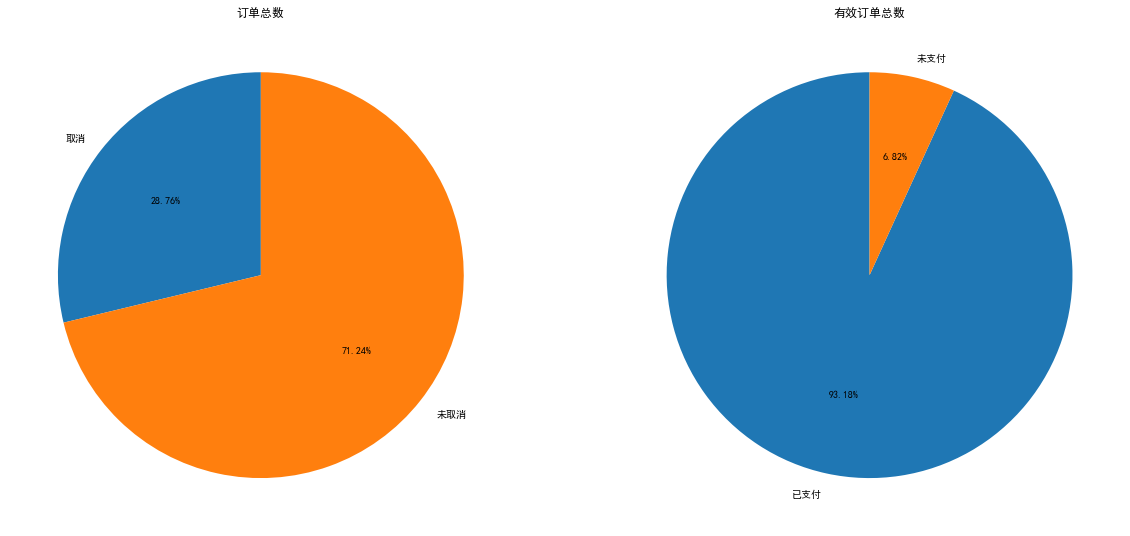

In [11]:
# 解决matplotlib中文乱码
matplotlib.rcParams["font.sans-serif"] = ["SimHei"]
matplotlib.rcParams["font.serif"] = ["SimHei"]
matplotlib.rcParams["axes.unicode_minus"] = False
 
fig,axes = plt.subplots(1,2,figsize =(10,5))
sizes = [order_cancel, order_sum - order_cancel]
axes[0].pie(sizes,labels = ["取消","未取消"],
             autopct = "%1.2f%%",startangle = 90)
axes[0].set_title("订单总数")
 
sizes = [order_payed,order_vaild-order_payed]
axes[1].pie(sizes,labels = ["已支付","未支付"],
              autopct = "%1.2f%%",startangle = 90)
axes[1].set_title("有效订单总数")

## 订单的价格分布

L:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
L:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
L:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


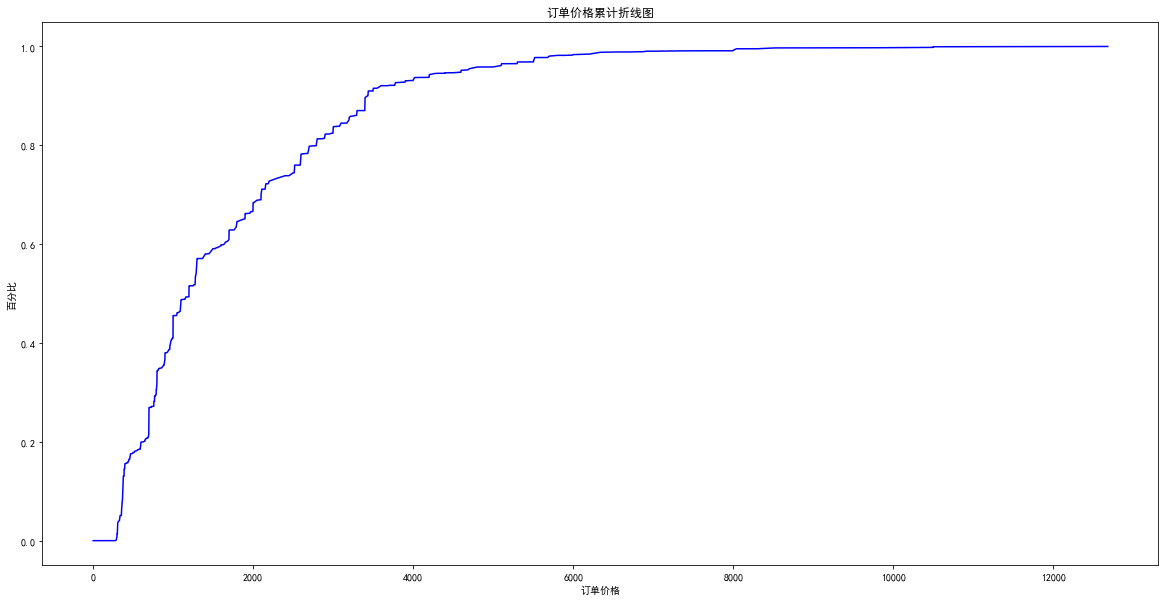

In [12]:
#查看订单价格分布
#处理数据，计算累计占比

order_price = pd.DataFrame(order_vaild_data.groupby("优惠后单价")["优惠后单价"].count())
order_price.columns = ["数量"]
order_price["占比"] = (order_price["数量"]/(order_price["数量"].sum())).cumsum()
 
#绘图
plt.figure(figsize=(20,10))
plt.xlabel("订单价格")
plt.ylabel("百分比")
 
x = order_price.index
y = order_price["占比"]
plt.plot(x,y,color="blue")
plt.title("订单价格累计折线图")
plt.savefig("./订单价格累计折线图.png",dpi = 150)

## 有效订单量

In [13]:
order_vaild_data1 = order_vaild_data.copy()
order_vaild_data1["订单小时"] = order_vaild_data1["订单时间"].str.extract("\s+([0-9]{2})", expand =True) #提取小时数
paytime_df = order_vaild_data1.groupby("订单小时")["订单号"].count()
print(paytime_df.index)
print(paytime_df.values)

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'],
      dtype='object', name='订单小时')
[4039  406  145  100   93  213  460  692 1086 1597 2030 1831 1863 1673
 1677 1604 1594 1761 1609 2019 2488 1944 1737 1097]


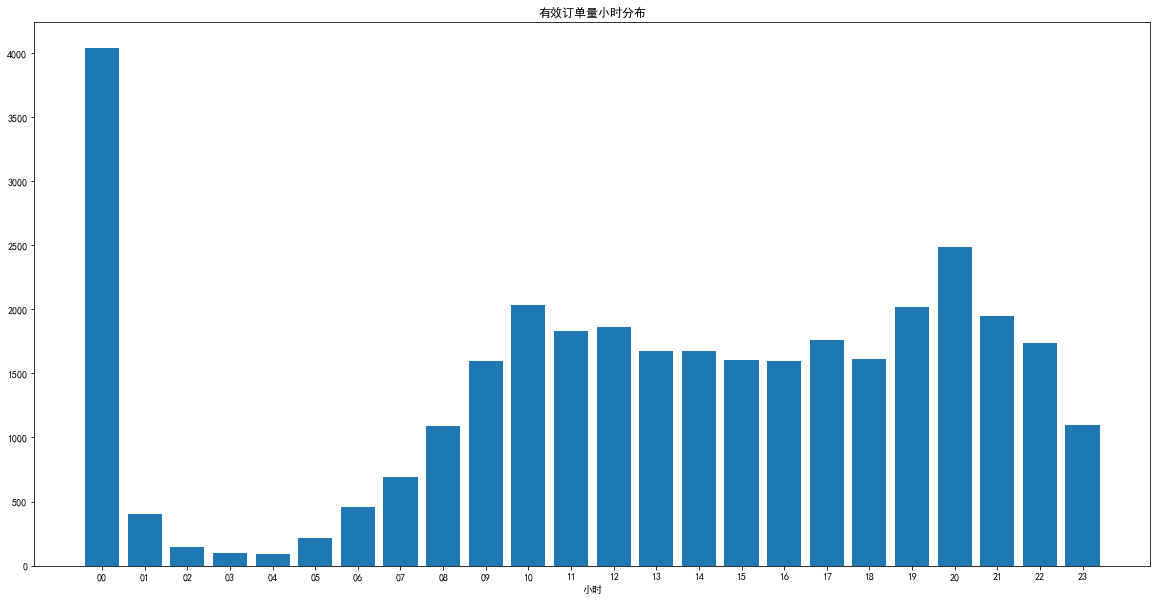

In [14]:
#不同时段的有效订单量
# import matplotlib.pyplot as plt
order_vaild_data1 = order_vaild_data.copy()
order_vaild_data1["订单小时"] = order_vaild_data1["订单时间"].str.extract("\s+([0-9]{2})", expand =True) #提取小时数
paytime_df = order_vaild_data1.groupby("订单小时")["订单号"].count()
 
#绘图
x = paytime_df.index
y = paytime_df.values

plt.figure(figsize=(20,10))
plt.title("有效订单量小时分布")
plt.xlabel("小时")
plt.bar(x,y)
plt.show()

## 人均有效订单量

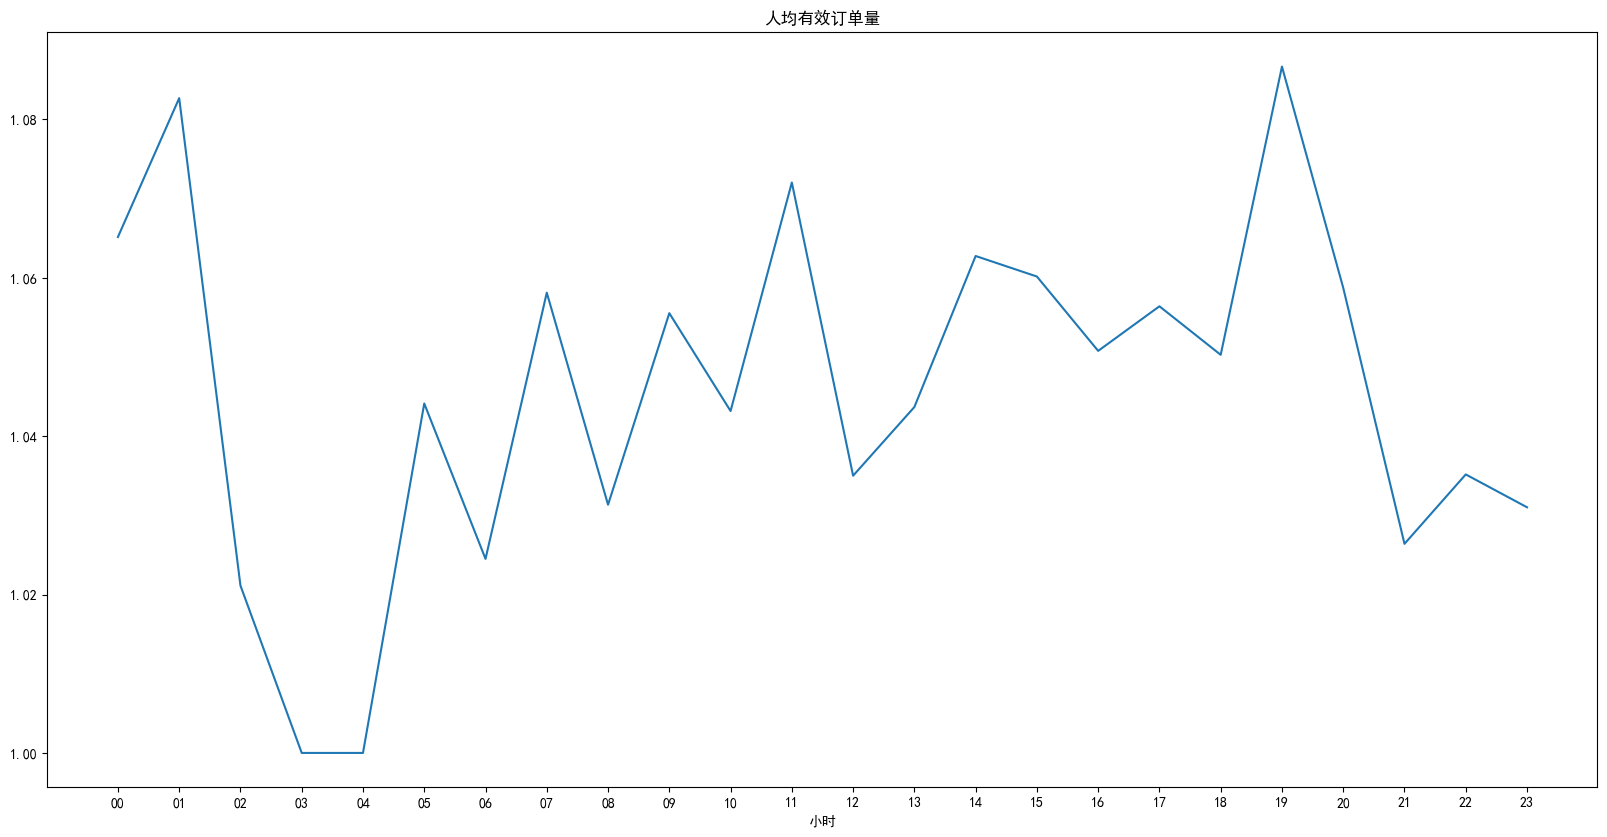

In [15]:
#人均有效订单量
pay_human_time = order_vaild_data1.groupby("订单小时")["用户账号"].nunique() #统计每个时段的用户数
 
#绘图
x = paytime_df.index
y = paytime_df.values/pay_human_time.values #计算人均有效订单量
 
plt.figure(figsize=(20,10),dpi = 100)
plt.title("人均有效订单量")
plt.xlabel("小时")
plt.plot(x,y)

## 客单价和平均订单价格

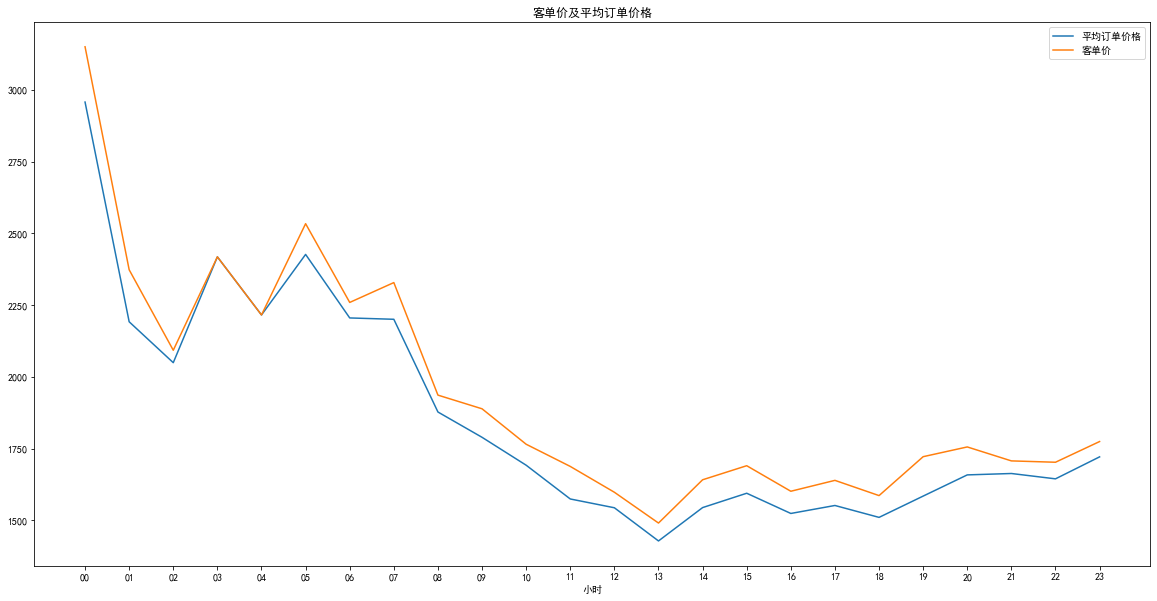

In [16]:
total_money = order_vaild_data1.groupby("订单小时")["总价格"].sum() #计算总价格
 
x = total_money.index
y1 = total_money.values/paytime_df.values #计算平均订单价格
y2 = total_money.values/pay_human_time.values #计算客单价
 
plt.figure(figsize=(20,10))
plt.plot(x,y1,linewidth = 1.5, )
plt.plot(x,y2, linewidth = 1.5, )
plt.xlabel("小时")
plt.title("客单价及平均订单价格")
plt.legend(["平均订单价格","客单价"])

## 优惠价格

Text(0.5, 1.0, '每时段订单优惠价格')

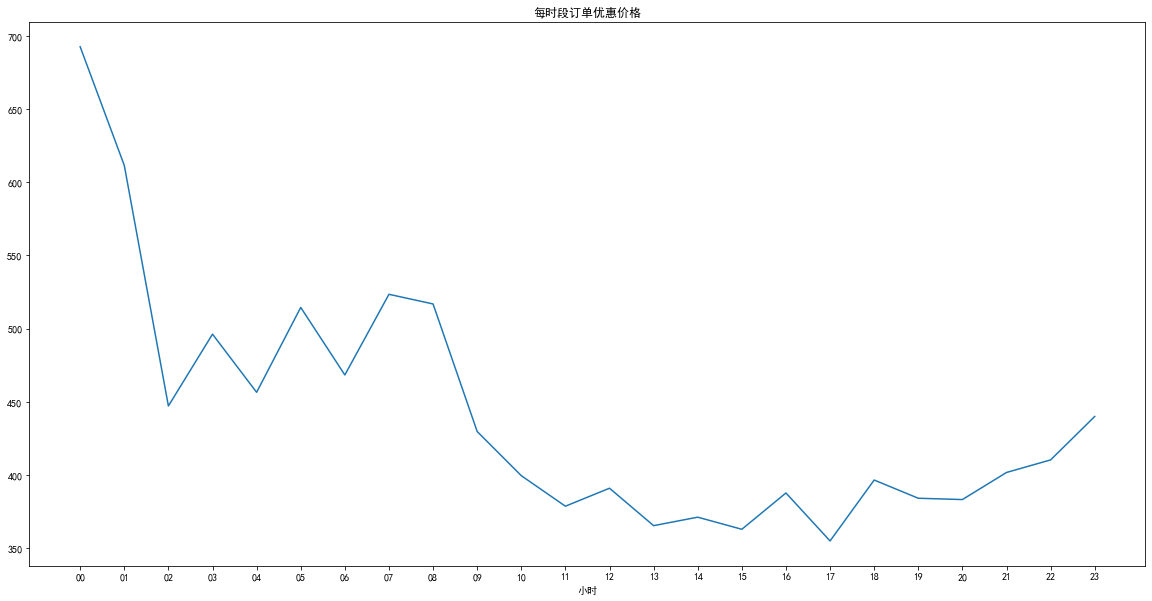

In [17]:
offer_amount = order_vaild_data1.groupby("订单小时")["总优惠金额"].sum() #计算优惠金额
 
#绘图
x = paytime_df.index
y = offer_amount.values/paytime_df.values #计算平均订单优惠价格
 
plt.figure(figsize=(20,10))
plt.plot(x,y)
plt.xlabel("小时")
plt.title("每时段订单优惠价格")

# 地区数据

In [18]:
city = 'city_level.csv'
df_city = pd.read_csv(city,sep = ',', encoding="gbk", dtype=str)
df_city['province_id'] = df_city['province_id'].astype('int')
df_city

,dim_city_id,dim_city_name,city_id,dim_province_id,dim_province_name,province_id,city_level
0,1000,济南市,1000,13,山东,13,二线
1,1007,青岛市,1007,13,山东,13,二线
2,1016,淄博市,1016,13,山东,13,三线
3,1022,枣庄市,1022,13,山东,13,四线
4,1025,东营市,1025,13,山东,13,三线
...,...,...,...,...,...,...,...
473,965,南通市,965,12,江苏,12,三线
474,972,镇江市,972,12,江苏,12,三线
475,978,常州市,978,12,江苏,12,三线
476,984,无锡市,984,12,江苏,12,二线


In [19]:
area = df_city
area = area[["dim_province_name", "province_id"]].drop_duplicates("province_id")  # 只保留省份信息

In [27]:
df = order_vaild_data1[["订单号", "用户账号", "总价格", "用户所在省份编号", "用户所在城市编号"]]  # 选取数据
df = df.groupby("用户所在省份编号", as_index=False).agg({"订单号": "count", "用户账号": "nunique", "总价格": "sum"})
df.drop([34], inplace=True)
 
df["客单价"] = df["总价格"] / df["用户账号"]
df["订单占比"] = df["订单号"] / (df["订单号"].sum())
 
df = pd.merge(df, area, left_on="用户所在省份编号", right_on="province_id")  # 合并数据
df = df[["订单号", "用户账号", "总价格", "客单价", "订单占比", "dim_province_name"]]  # 选取数据子集
df.columns = ["有效订单量", "用户数量", "总价格", "客单价", "订单量占比", "省份"]  # 重命名列
df.sort_values(by="有效订单量", ascending=False, inplace=True)  # 降序排序，方便计算累计百分比


## 计算各省份的有效订单量

Text(0.5, 1.0, '各省有效订单数量和累计占比')

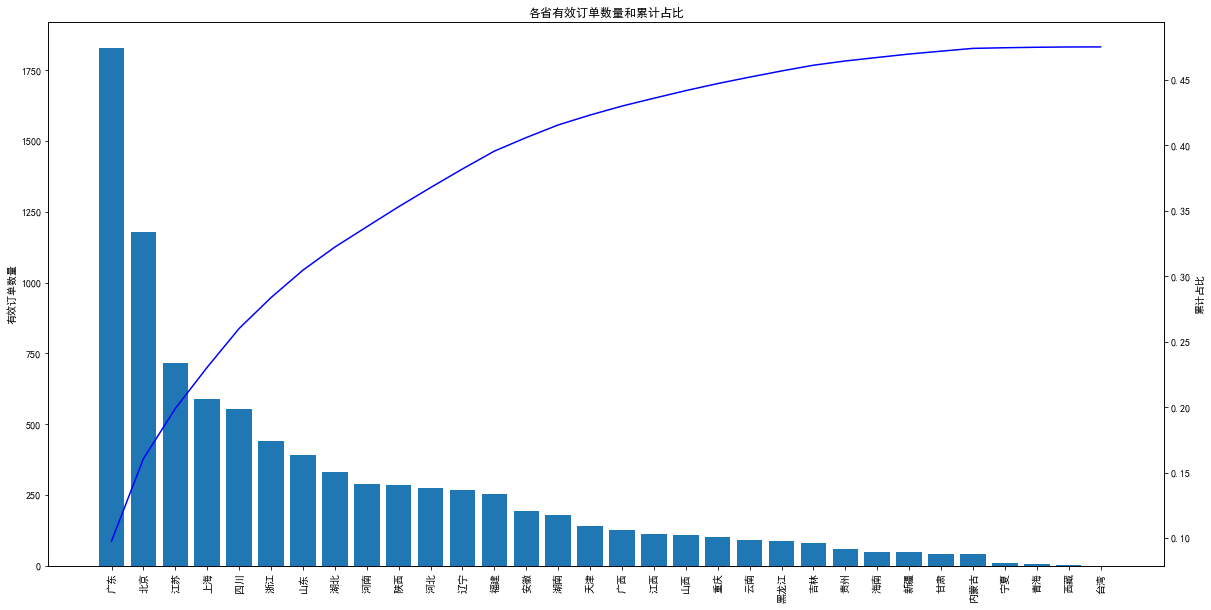

In [25]:
 
province_orders = df[["有效订单量", "省份", "订单量占比"]]
province_orders1 = province_orders.copy()
province_orders1["累计占比"] = province_orders["订单量占比"].cumsum()
 
# 绘图
x = province_orders1["省份"]
y1 = province_orders1["有效订单量"]
y2 = province_orders1["累计占比"]
 
fig, ax1 = plt.subplots(figsize=(20,10))
 
ax1.bar(x, y1)
plt.xticks(rotation=90)
ax1.set_ylabel("有效订单数量")
 
ax2 = ax1.twinx()
ax2.plot(x, y2, color="blue")
ax2.set_ylabel("累计占比")
 
plt.title("各省有效订单数量和累计占比")

Text(0.5, 1.0, '前十省份的客单价')

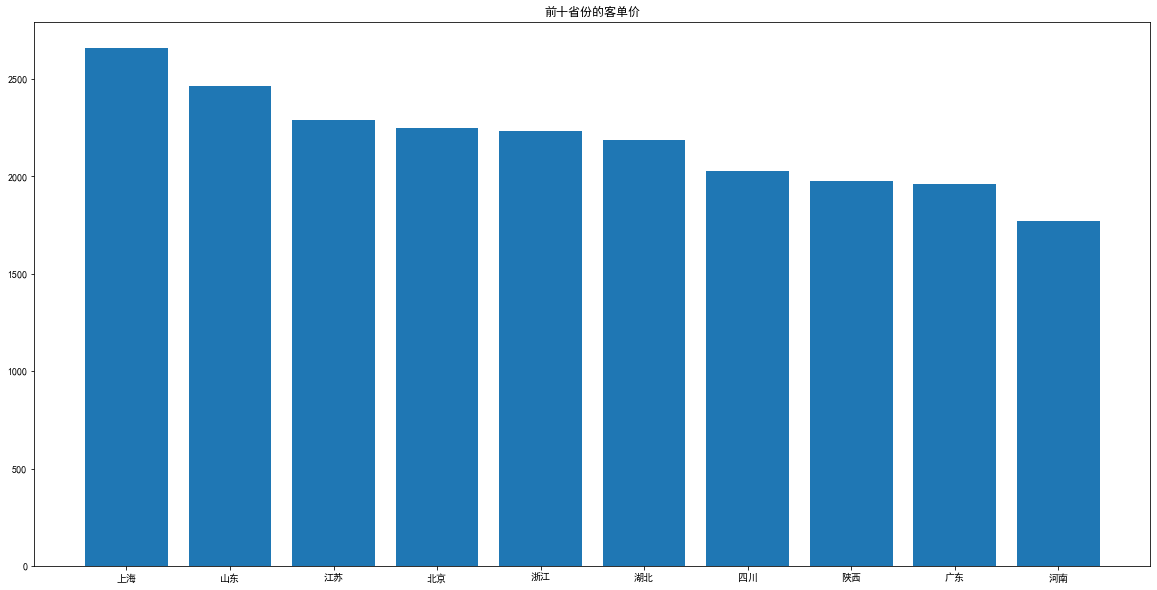

In [26]:
#客单价前十省份情况
price_per  = df.reset_index(drop = True)[:10]
price_per.sort_values(by = "客单价", ascending = False, inplace = True) #降序排序，方便作图
 
#绘图
x = price_per["省份"]
y = price_per["客单价"]
 
plt.figure(figsize=(20,10))
plt.bar(x,y)
plt.title("前十省份的客单价")

## 各省份的客单价和订单数量对比

Text(0.5, 1.0, '各省份的客单价和订单数量对比')

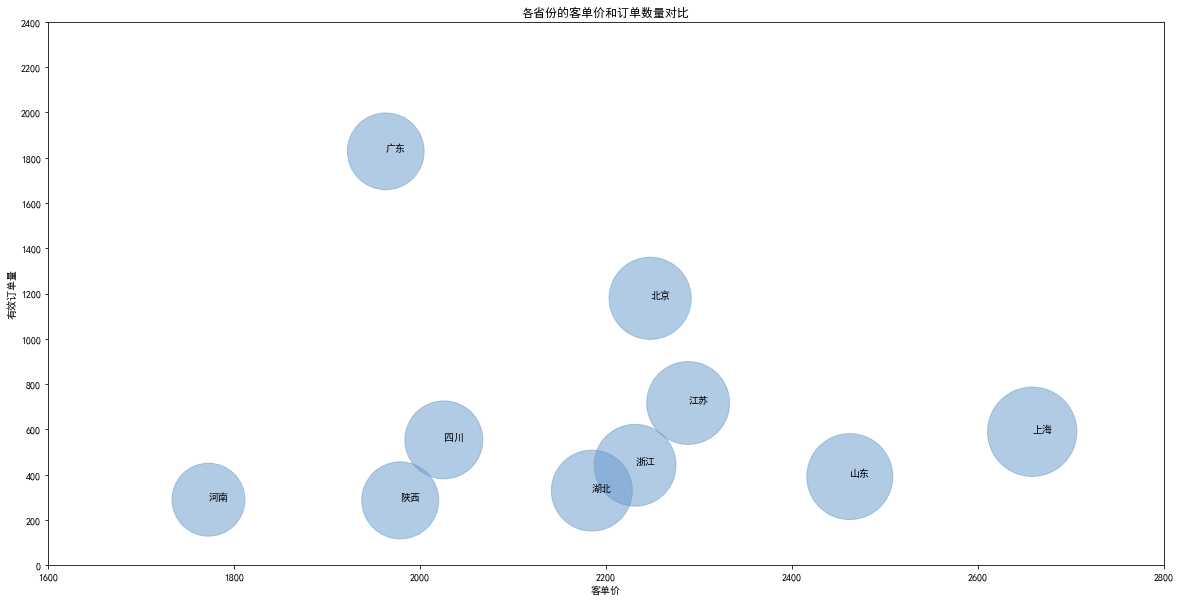

In [29]:
x =price_per["客单价"]
y = price_per["有效订单量"]
txt = price_per["省份"]
 
plt.figure(figsize = (20,10))
plt.scatter(x,y,alpha=0.5, s=x*3, c=["#6699CC"])
plt.xlabel("客单价")
plt.xticks(np.arange(1600, 3000, 200))
plt.ylabel("有效订单量")
plt.yticks(np.arange(0, 2500, 200))
 
#添加散点图标签
for i in range(len(x)):
    plt.annotate(txt[i], xy = (x[i], y[i]), xytext = (x[i], y[i]))
plt.title("各省份的客单价和订单数量对比")

## 各品牌有效订单量

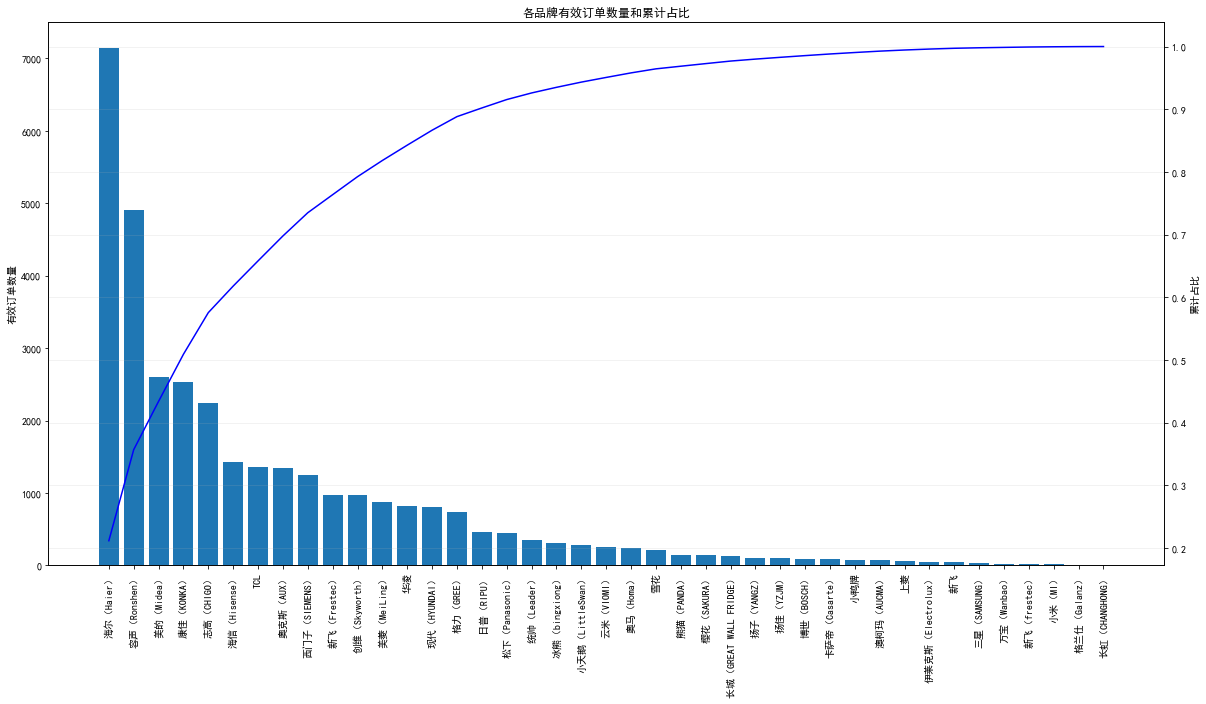

In [31]:
#各品牌有效订单量
df= order_vaild_data.groupby("品牌名称",as_index = False)["订单号"].count().sort_values("订单号",ascending = False)
 
df["占比"] = df["订单号"] / (df["订单号"].sum())
df["累积占比"] = df["占比"].cumsum()
 
x = df["品牌名称"]
y1 = df["订单号"]
y2 = df["累积占比"]
 
fig,ax1 = plt.subplots(figsize=(20,10))
 
ax1.bar(x,y1)
ax1.set_ylabel("有效订单数量")
ax1.set_xticklabels(x, rotation=90)
ax2 = ax1.twinx()
ax2.plot(x,y2,color = "blue")
ax2.set_ylabel("累计占比")
 
plt.title("各品牌有效订单数量和累计占比")
plt.grid(alpha =0.2)

## 头部省份的品牌市场占有率

Text(0.5, 1.0, '头部省份的品牌市场占有率')

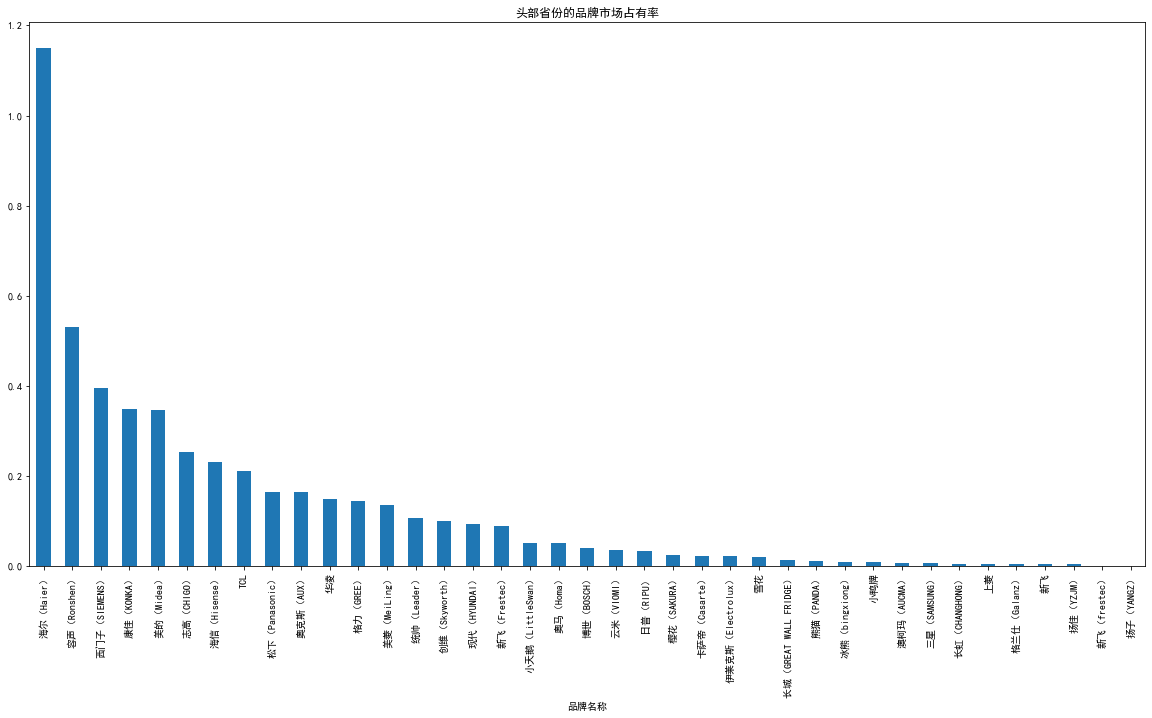

In [32]:
df = order_vaild_data.groupby(["用户所在省份编号","品牌名称"],as_index=False)["订单号"].count()
 
df= df[df["用户所在省份编号"] != "-1"]
df["用户所在省份编号"] = df["用户所在省份编号"].astype(int)
df_city = pd.merge(df,area,left_on = "用户所在省份编号",right_on ="province_id" )
 
 
df_city = df_city[df_city["dim_province_name"].isin(["广东","北京","上海","江苏","四川"])]  #筛选头部省份
df_city = df_city[["品牌名称","订单号","dim_province_name"]]
df_city.columns = ["品牌名称","订单量","省份"]
df_city = df_city.pivot(values = "订单量",columns = "省份",index = "品牌名称") #透视表透视数据
 
df_city_sum = df_city/(df_city.sum()) #计算市场订单量占比
df_city_sum.sum(axis = 1).sort_values(ascending = False).plot(kind="bar",figsize=(20,10)) #计算累计占比并绘图
plt.title("头部省份的品牌市场占有率")

## 各品牌的平均产品价格和市场占有率

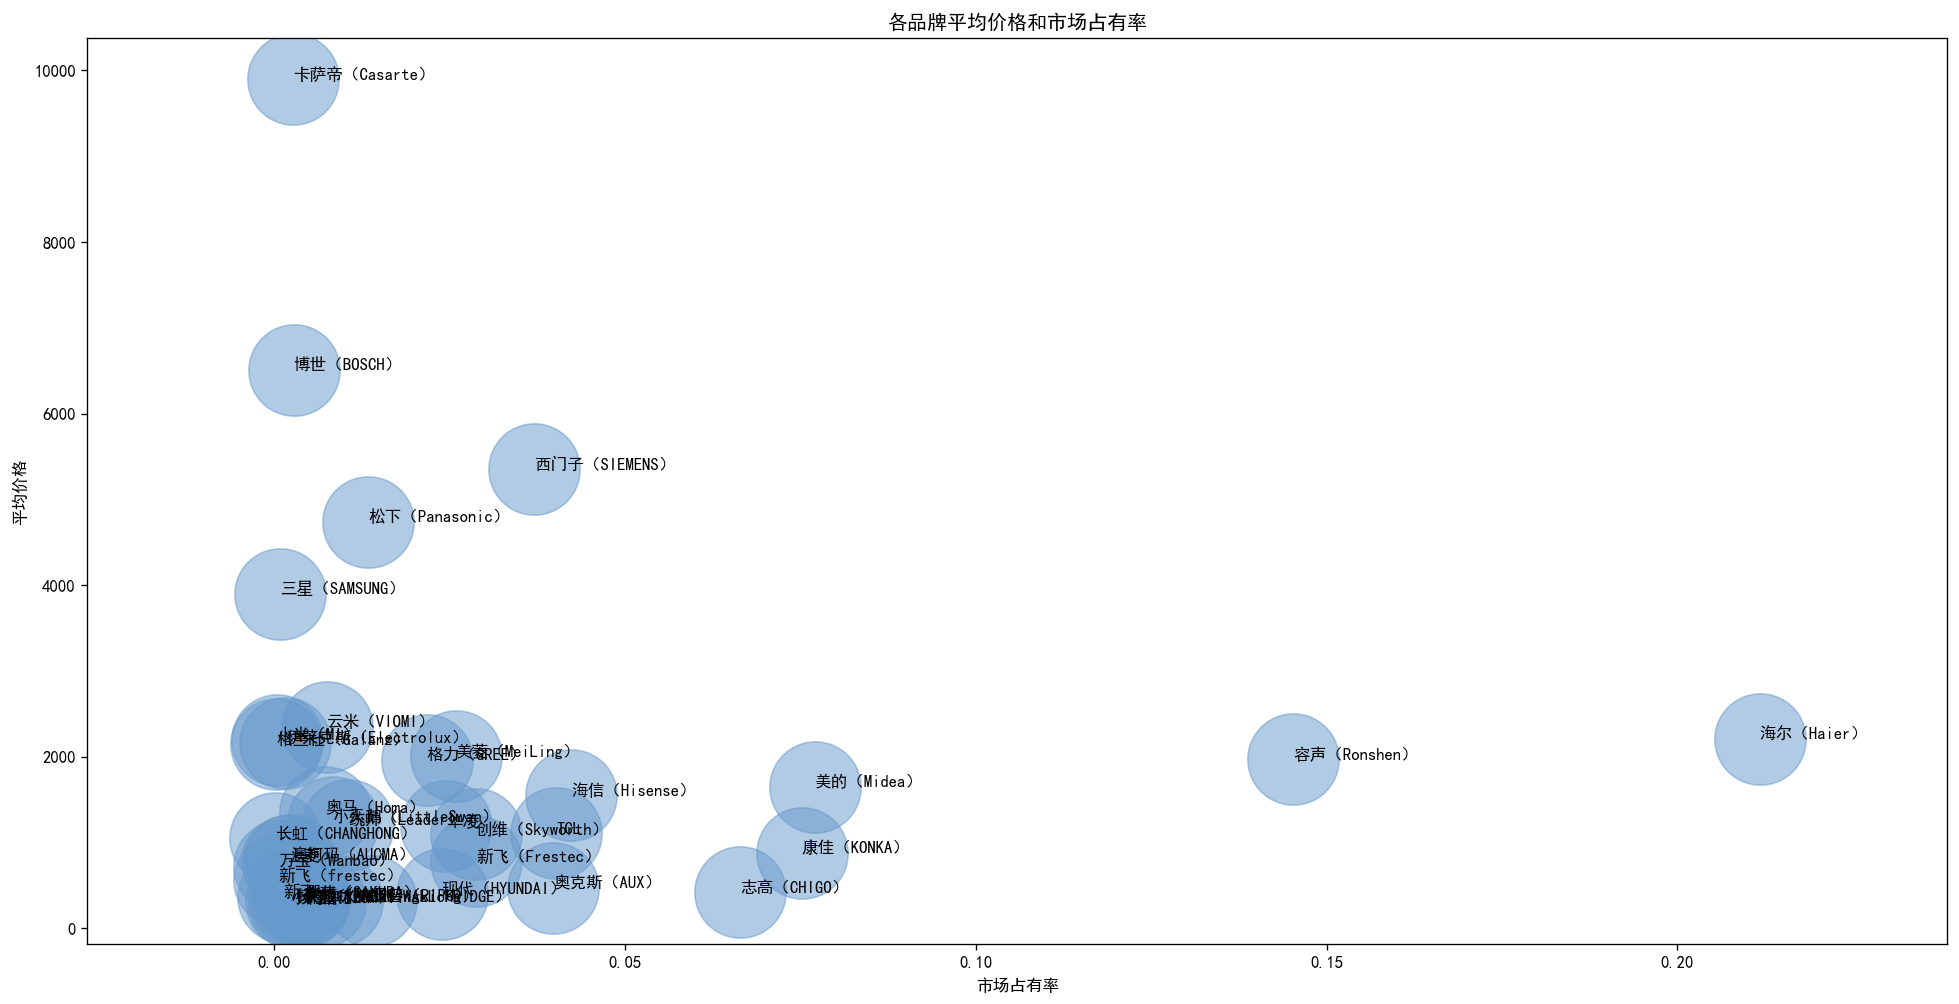

In [33]:
#品牌市场占有率和平均价格
df1 = order_vaild_data.groupby("品牌名称",as_index=False).agg({"总价格":"sum","商品数量":"sum"})
df1["单价"] = df1["总价格"]/df1["商品数量"]
 
df2 = order_vaild_data.groupby("品牌名称",as_index = False)["订单号"].count().sort_values("订单号",ascending = False)
df2["占比"] = df2["订单号"] / (df2["订单号"].sum())
df2["累积占比"] = df2["占比"].cumsum()
 
df = pd.merge(df1,df2,on = "品牌名称")
df = df[["品牌名称","单价","占比"]]
 
x = df["占比"]
y = df["单价"]
txt = df["品牌名称"]
 
plt.figure(figsize = (20,10), dpi = 120)
plt.scatter(x, y,alpha = 0.5, s = 3000,c=["#6699CC"] )
 
plt.xlabel("市场占有率")
plt.ylabel("平均价格")
plt.title("各品牌平均价格和市场占有率")
 
for i in range(len(x)):
    plt.annotate(txt[i], xy = (x[i], y[i]), xytext = (x[i], y[i]))

## 各品牌的订单数量和平均优惠价格

Text(0.5, 1.0, '订单数量与平均优惠价格的关系')

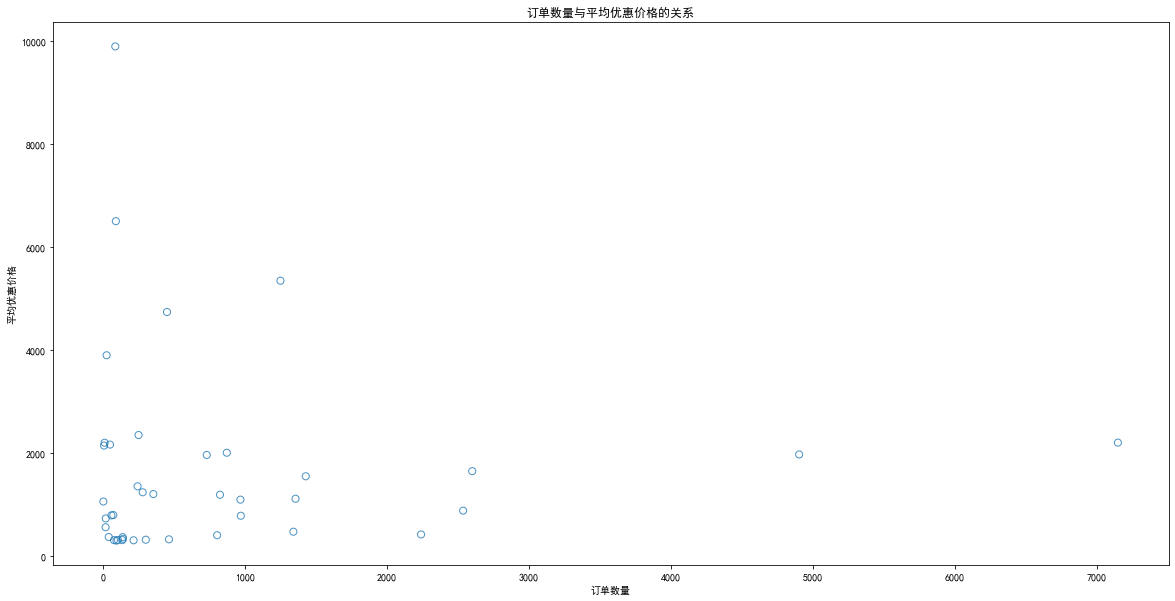

In [35]:
#订单数量与平均优惠价格
df = order_vaild_data.groupby("品牌名称",as_index = False).agg({"总价格":"sum","商品数量":"sum","订单号":"count"})
df["优惠单价"] = df["总价格"] / df["商品数量"]
df = df[["品牌名称","订单号","优惠单价"]]
df.columns = ["品牌名称","订单数量","优惠单价"]
 
#绘图
x = df["订单数量"]
y = df["优惠单价"]
 
plt.figure(figsize = (20,10))
plt.scatter(x,y,alpha = 0.8,s =50,color = "",marker="o", edgecolors="#1f77b4")
 
plt.xlabel("订单数量")
plt.ylabel("平均优惠价格")
plt.title("订单数量与平均优惠价格的关系")